In [1]:
#!/usr/bin/python

# Note to Kagglers: This script will not run directly in Kaggle kernels. You
# need to download it and run it on your local machine.

# Downloads images from the Google Landmarks dataset using multiple threads.
# Images that already exist will not be downloaded again, so the script can
# resume a partially completed download. All images will be saved in the JPG
# format with 90% compression quality.

import sys, os, multiprocessing, csv
from PIL import Image
from io import BytesIO
from urllib.request import urlopen
import tqdm
from tqdm import tnrange

from matplotlib import pyplot as plt




def ParseData(data_file):
  csvfile = open(data_file, 'r')
  csvreader = csv.reader(csvfile)
  dataset = [line for line in csvreader]
  return dataset[1:]  # Chop off header


def DownloadImage(data):
  (key, url, label) = data

  try:
    response = urlopen(url)
    image_data = response.read()
  except:
    #print('Warning: Could not download image %s from %s' % (key, url))
    return

  try:
    pil_image = Image.open(BytesIO(image_data))
    return pil_image
  except:
    #print('Warning: Failed to parse image %s' % key)
    return


In [2]:
def Create_labels (data_file):
    dataset_url = ParseData(data_file)
    dataset = []
    for data in tqdm.tqdm(dataset_url[:len(dataset_url)], total=len(dataset_url)) :
        (key, url, label) = data 
        dataset.append(int(label))
    return dataset

In [3]:
list_labels = Create_labels("train.csv")

100%|███████████████████████████████████████████████████████████████████| 1225029/1225029 [00:00<00:00, 1335609.03it/s]


In [4]:
len(list_labels)

1225029

In [5]:
max(list_labels)

14950

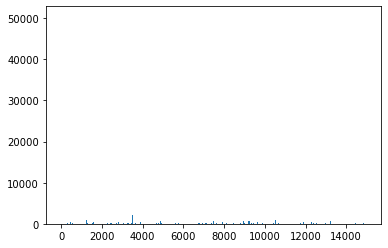

In [6]:
num_labels = plt.hist(list_labels, bins=range(max(list_labels)+2))

In [7]:
num_labels = num_labels[0]

In [8]:
max(num_labels)

50337.0

In [9]:
i= 0
for j in tnrange(len(list_labels)) :
    if num_labels[list_labels[i]]<225 or num_labels[list_labels[i]]>300 :
        del list_labels[i]
    else :
        i=i+1

<ipython-input-9-f3604546b08b>:2: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for j in tnrange(len(list_labels)) :


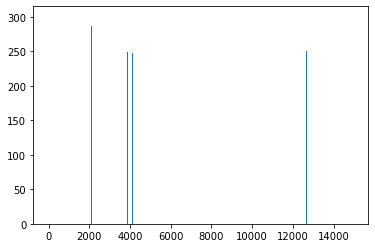

In [10]:
num_labels = plt.hist(list_labels, bins=range(14950+2))

In [11]:
num_labels = num_labels[0]

In [12]:
max(num_labels)

300.0

In [13]:
len(list_labels)

61801

In [14]:
compteur = 0
dataset_url = ParseData("train.csv")
image_per_label = [0]*(15000)
for data in tqdm.tqdm(dataset_url[:len(dataset_url)], total=len(dataset_url)):
    (key, url, label) = data
    if (num_labels[int(label)]>225 and num_labels[int(label)]<300) and image_per_label[int(label)]<150 :
        image_per_label[int(label)]+=1
        compteur+=1
compteur

100%|████████████████████████████████████████████████████████████████████| 1225029/1225029 [00:01<00:00, 715496.87it/s]


34950

In [15]:
def CreateDataset(data_file, num_labels) :
    dataset_url = ParseData(data_file)
    list_labels = []
    list_images = []
    image_per_label = [0]*(15000)
    for data in tqdm.tqdm(dataset_url[:len(dataset_url)], total=len(dataset_url)):
        (key, url, label) = data
        if (num_labels[int(label)]>225 and num_labels[int(label)]<300) and image_per_label[int(label)]<150 :
            pil_image = DownloadImage(data)
            if pil_image!= None :
                list_labels.append(label)
                list_images.append(pil_image)
                image_per_label[int(label)]+=1
    return list_images, list_labels

In [ ]:
nouv_list_images, nouv_list_labels = CreateDataset("train.csv", num_labels)

 22%|███████████████                                                     | 272427/1225029 [1:07:40<15:04:26, 17.55it/s]

In [ ]:
len(nouv_list_images)

In [ ]:
compteur = 0
for i in tqdm.tqdm(range(len(nouv_list_images)), total = len(nouv_list_images)) :
        nouv_list_images[i].save("testsup150\ " + str(nouv_list_labels[i])+ "image" +str(compteur)+".png")
        compteur+=1